## Gym Memberships Exploratory Analysis

### Install Libraries

In [3]:
pip install kagglehub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### Import Libraries

In [54]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os

### Import Data

In [5]:
# Download latest version
path = kagglehub.dataset_download("ka66ledata/gym-membership-dataset")

print("Path to dataset files:", path)

100%|███████████████████████████████████████| 27.1k/27.1k [00:00<00:00, 677kB/s]

Extracting files...
Path to dataset files: /Users/davneetkaur/.cache/kagglehub/datasets/ka66ledata/gym-membership-dataset/versions/1


In [9]:
# List the contents of the directory to find the CSV file
downloaded_files = os.listdir(path)
print("Files in the dataset directory:", downloaded_files)

Files in the dataset directory: ['gym_membership.csv']


In [19]:
# Load the CSV file into a DataFrame (replace with the actual filename)
csv_filename = "gym_membership.csv"  # Change to actual filename if different
data_file_path = os.path.join(path, csv_filename)

# Read the CSV into a DataFrame
gym_df = pd.read_csv(data_file_path)

# Display the first few rows of the DataFrame
gym_df.head()

,id,first_name,gender,birthday,Age,abonoment_type,visit_per_week,days_per_week,attend_group_lesson,fav_group_lesson,avg_time_check_in,avg_time_check_out,avg_time_in_gym,personal_training,name_personal_trainer
0,1,Fey,Female,1997-04-18,27,Premium,4,"Mon, Sat, Tue, Wed",True,Kickboxen,19:31:00,21:42:00,131,False,NaN
1,2,Doralin,Female,1977-09-18,47,Standard,3,"Fri, Sat, Sun",False,NaN,19:31:00,21:43:00,132,True,Chantal
2,3,Linc,Male,1983-03-30,41,Premium,1,Sun,True,"XCore, Spinning, LesMiles",08:29:00,09:55:00,86,True,Mike
3,4,Darren,Male,1980-04-12,44,Premium,3,"Fri, Sat, Tue",False,NaN,09:54:00,12:15:00,141,True,Mike
4,5,Petr,Male,1980-09-10,44,Standard,2,"Thu, Tue",True,"Running, BodyBalance",08:29:00,10:39:00,130,True,Mike


### Data Exploration

In [21]:
gym_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     1000 non-null   int64 
 1   first_name             1000 non-null   object
 2   gender                 1000 non-null   object
 3   birthday               1000 non-null   object
 4   Age                    1000 non-null   int64 
 5   abonoment_type         1000 non-null   object
 6   visit_per_week         1000 non-null   int64 
 7   days_per_week          1000 non-null   object
 8   attend_group_lesson    1000 non-null   bool  
 9   fav_group_lesson       503 non-null    object
 10  avg_time_check_in      1000 non-null   object
 11  avg_time_check_out     1000 non-null   object
 12  avg_time_in_gym        1000 non-null   int64 
 13  personal_training      1000 non-null   bool  
 14  name_personal_trainer  518 non-null    object
dtypes: bool(2), int64(4), 

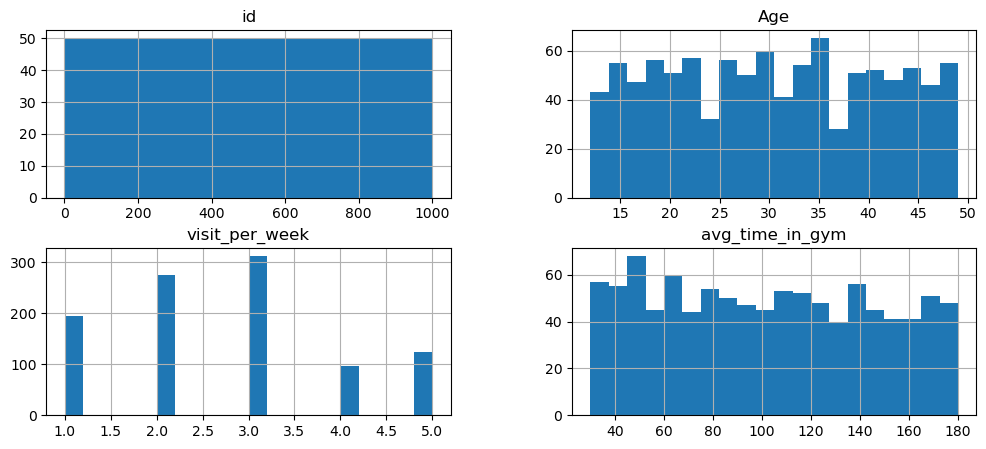

In [39]:
gym_df.hist(bins=20, figsize = (12,5))
plt.show()

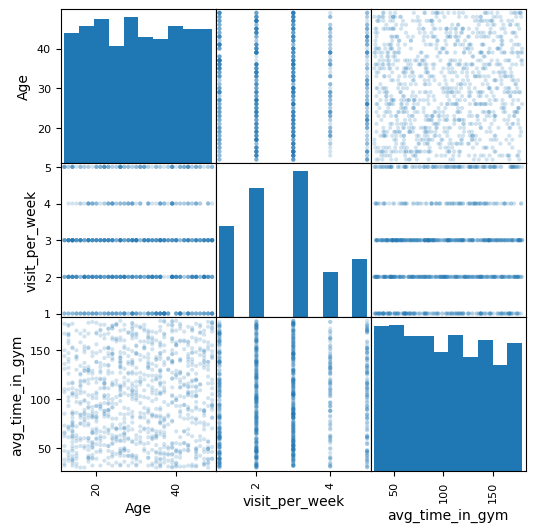

In [50]:
from pandas.plotting import scatter_matrix
attributes = ['Age','visit_per_week','avg_time_in_gym']

scatter_matrix(gym_df[attributes], figsize =(6,6), alpha =0.2)
plt.show()

/var/folders/1w/f1nvvnys0db1_sj90qqds2780000gn/T/ipykernel_12386/3507010642.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='Age', data=gym_df, palette=palette)


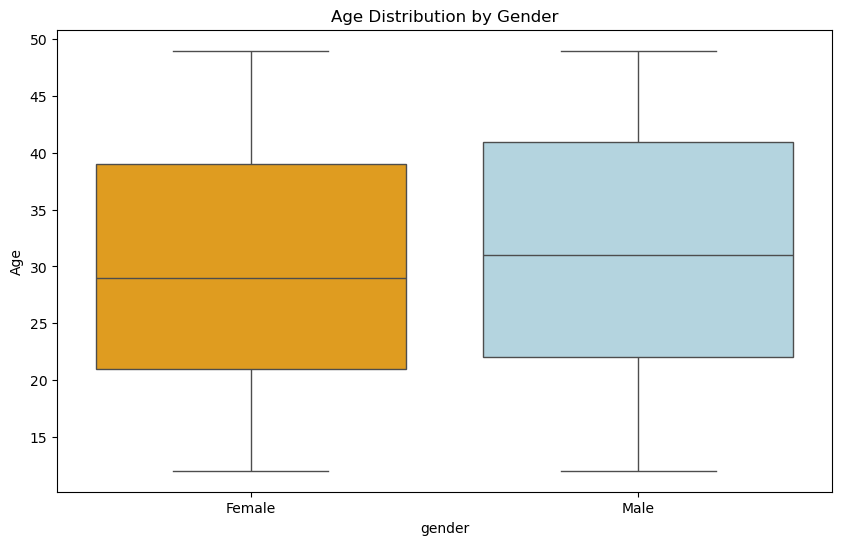

In [72]:
plt.figure(figsize=(10, 6))
palette = {'Female': 'orange', 'Male': 'lightblue'}  # Customize colors for genders
sns.boxplot(x='gender', y='Age', data=gym_df, palette=palette)
plt.title('Age Distribution by Gender')
plt.show()

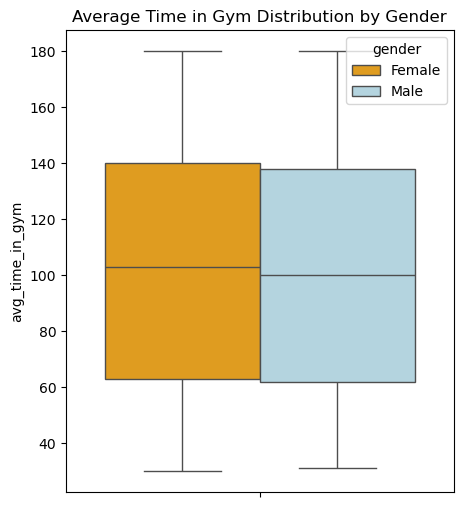

In [92]:
plt.figure(figsize=(5, 6))
#sns.boxplot(x='gender', y='avg_time_in_gym', data=gym_df, palette=palette)
# Create the boxplot with hue
sns.boxplot(hue='gender', y='avg_time_in_gym', data=gym_df, palette=palette, dodge=True)

plt.title('Average Time in Gym Distribution by Gender')
plt.show()

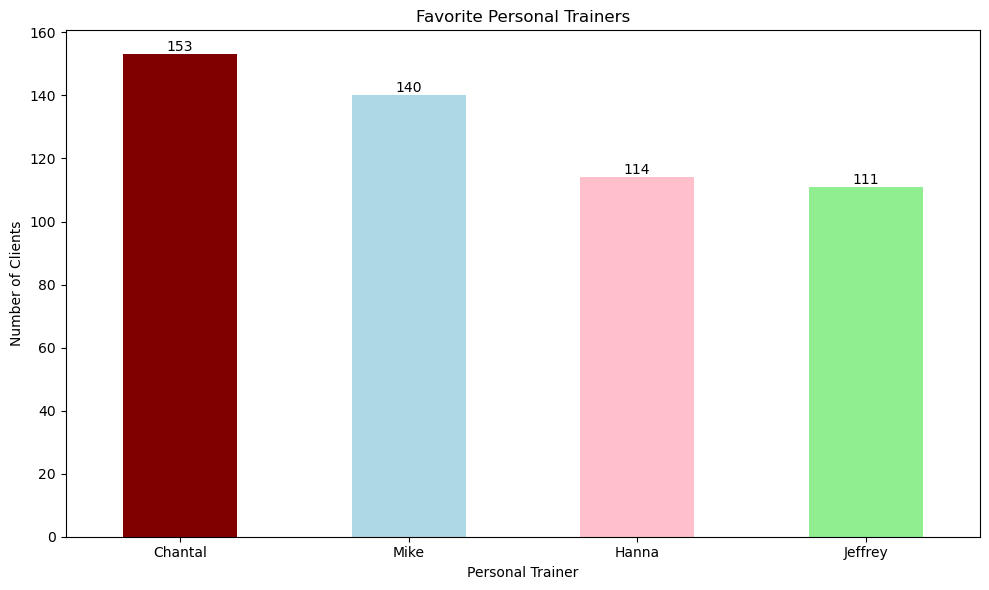

In [164]:
palette = {'Mike': 'lightblue','Chantal': 'maroon', 'Hanna':'pink', 'Jeffrey':'lightgreen'}
# Favorite Personal Trainer
trainer_counts = gym_df[gym_df['personal_training'] == True]['name_personal_trainer'].value_counts()
colors = trainer_counts.index.map(palette).fillna('gray')

# Create a bar plot
plt.figure(figsize=(10, 6))
trainer_counts.plot(kind='bar', color = colors)
plt.title('Favorite Personal Trainers')
plt.xlabel('Personal Trainer')
plt.ylabel('Number of Clients')
plt.xticks(rotation=0)

# Add value labels on top of each bar
for i, v in enumerate(trainer_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

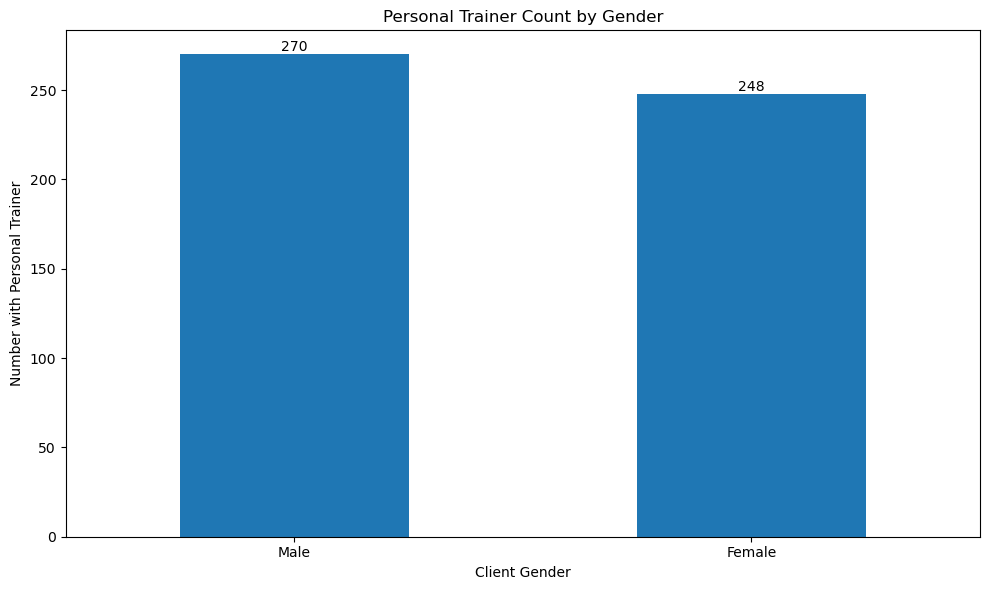

In [158]:
# Favorite Personal Trainer
trainer_counts = gym_df[gym_df['personal_training'] == True]['gender'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
trainer_counts.plot(kind='bar')
plt.title('Personal Trainer Count by Gender')
plt.xlabel('Client Gender')
plt.ylabel('Number with Personal Trainer')
plt.xticks(rotation=0)

# Add value labels on top of each bar
for i, v in enumerate(trainer_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

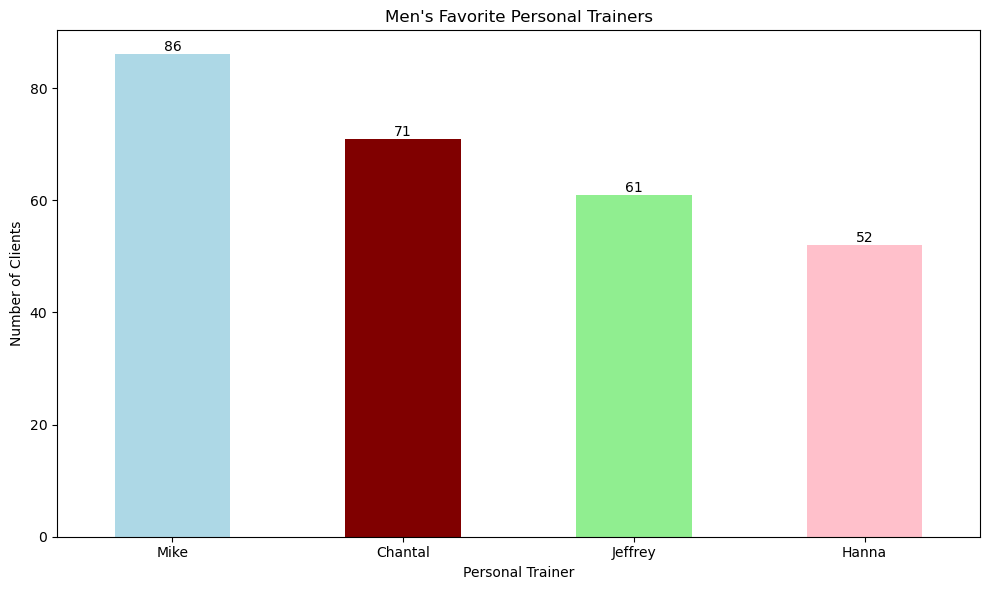

In [166]:
# Favorite Personal Trainer among men
trainer_counts_men = gym_df[(gym_df['personal_training'] == True) & (gym_df['gender'] == 'Male')]['name_personal_trainer'].value_counts()
# Favorite Personal Trainer among women
trainer_counts_women = gym_df[(gym_df['personal_training'] == True) & (gym_df['gender'] == 'Female')]['name_personal_trainer'].value_counts()

colors = trainer_counts_men.index.map(palette).fillna('gray')
# Create a bar plot
plt.figure(figsize=(10, 6))
trainer_counts_men.plot(kind='bar', color = colors)
plt.title("Men's Favorite Personal Trainers")
plt.xlabel('Personal Trainer')
plt.ylabel('Number of Clients')
plt.xticks(rotation=0)

# Add value labels on top of each bar
for i, v in enumerate(trainer_counts_men):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

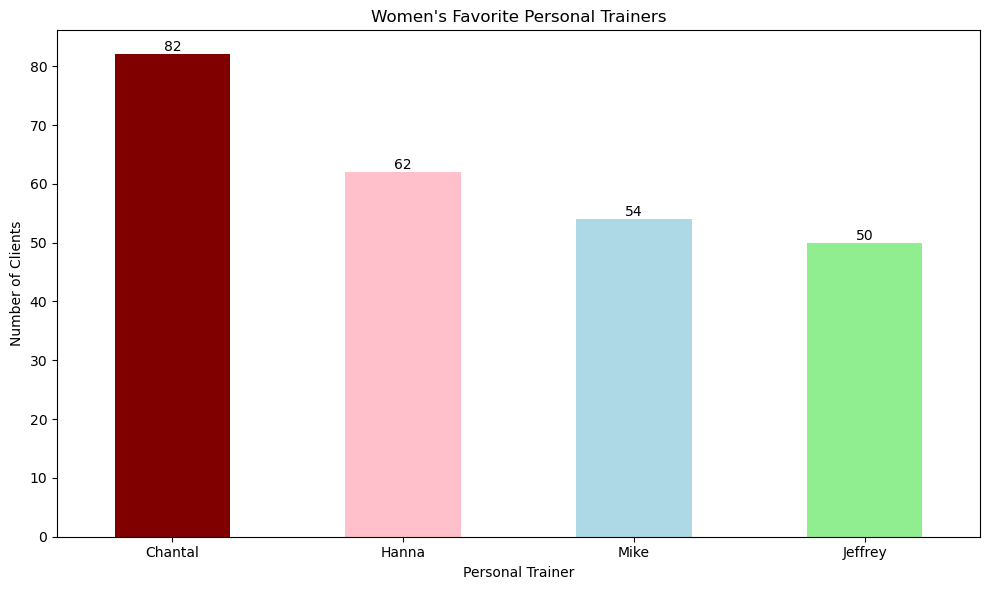

In [168]:
# Create a bar plot
colors = trainer_counts_women.index.map(palette).fillna('gray')
plt.figure(figsize=(10, 6))
trainer_counts_women.plot(kind='bar', color = colors)
plt.title("Women's Favorite Personal Trainers")
plt.xlabel('Personal Trainer')
plt.ylabel('Number of Clients')
plt.xticks(rotation=0)

# Add value labels on top of each bar
for i, v in enumerate(trainer_counts_women):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

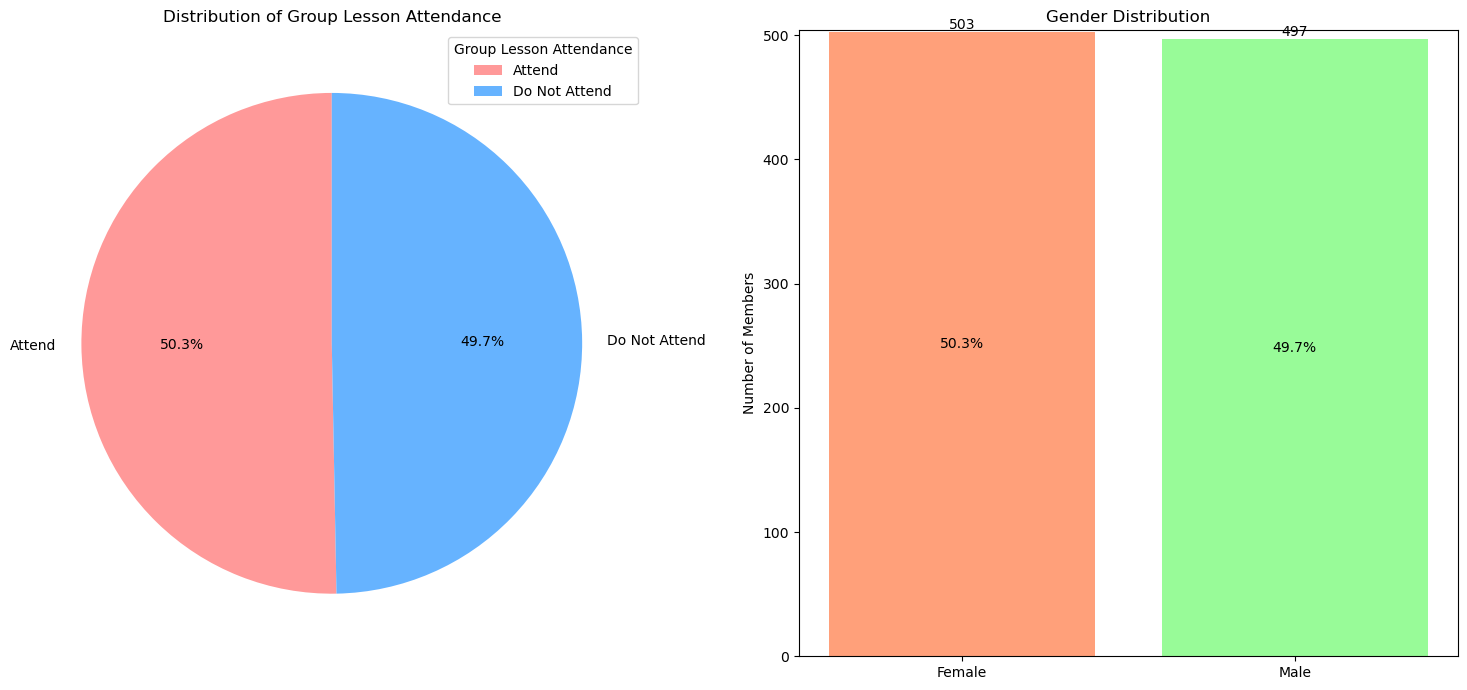

In [136]:
# Count the number of attendees and non-attendees
attendance_counts = gym_df['attend_group_lesson'].value_counts()

# Count the number of males and females
gender_counts = gym_df['gender'].value_counts()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Pie chart for group lesson attendance
ax1.pie(attendance_counts.values, labels=['Attend', 'Do Not Attend'], autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
ax1.set_title('Distribution of Group Lesson Attendance')
ax1.legend(title="Group Lesson Attendance")

# Bar chart for gender distribution
gender_colors = ['#ffa07a', '#98fb98']  # Light salmon for female, pale green for male
ax2.bar(gender_counts.index, gender_counts.values, color=gender_colors)
ax2.set_title('Gender Distribution')
ax2.set_ylabel('Number of Members')
ax2.set_ylim(0, max(gender_counts.values) + 1)  # Set y-axis limit with some padding

# Add value labels on top of each bar
for i, v in enumerate(gender_counts.values):
    ax2.text(i, v, str(v), ha='center', va='bottom')

# Add percentage labels for each gender
total = sum(gender_counts.values)
for i, (gender, count) in enumerate(gender_counts.items()):
    percentage = (count / total) * 100
    ax2.text(i, count/2, f'{percentage:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()